<a href="https://colab.research.google.com/github/Rikkkkkin/PS4HouseDataExercise/blob/master/Predict_House_Prices_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [2]:
!git clone https://github.com/Rikkkkkin/PS4HouseDataExercise

Cloning into 'PS4HouseDataExercise'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13 (delta 2), reused 1 (delta 0), pack-reused 5
Unpacking objects: 100% (13/13), done.


In [3]:
data = pd.read_csv('/content/PS4HouseDataExercise/train.csv')
data.shape
train = data.iloc[0:20,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [4]:
# investigate Sale Price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <a list of 10 Patch objects>)

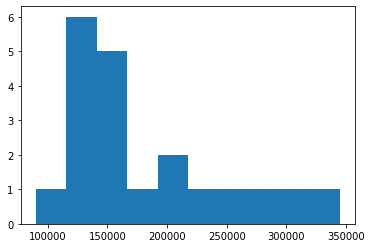

In [8]:
# plot hist
plt.hist(train['SalePrice'])

In [47]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
num_cols=numeric.columns
cat_cols=list(set(train.columns) - set(num_cols))
num_cols=num_cols.drop('SalePrice')

In [26]:
from sklearn import preprocessing
data=train
for column in cat_cols:
        target_column = train[column]
        le = preprocessing.LabelEncoder()
        le.fit(target_column)
        label_encoded_column = le.transform(target_column)
        data[column] = pd.Series(label_encoded_column).astype('category')

data=data.drop(['Id'], axis=1)

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')# strategy can also be mean or median 
imputer.fit(data)
imputer=imputer.transform(data)
data_filled=pd.DataFrame(imputer, columns=data.columns)

In [28]:
#LASSO selection

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

X=data_filled.drop(['SalePrice'], axis=1)
Y=data_filled['SalePrice']

lasso = Lasso(alpha=1,normalize=True)
lasso.fit(X, Y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+07, tolerance: 8.

Lasso(alpha=1, normalize=True)

In [30]:
selected_cols=X.columns[(lasso.coef_ != 0).ravel().tolist()]


In [65]:
test_use[selected_cols]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,GarageCars,GarageArea,GarageQual,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal
0,20.0,RL,74.0,10206.0,Reg,Edwards,Norm,Norm,1Fam,1Story,...,2.0,528.0,TA,0.0,0.0,0.0,0.0,MnPrv,Shed,0.0
1,30.0,RL,60.0,5400.0,Reg,OldTown,Norm,Norm,1Fam,1Story,...,1.0,216.0,Fa,20.0,94.0,0.0,0.0,MnPrv,Shed,0.0
2,20.0,RL,75.0,11957.0,IR1,Somerst,RRAn,Norm,1Fam,1Story,...,3.0,824.0,TA,104.0,0.0,0.0,0.0,MnPrv,Shed,0.0
3,90.0,RL,68.0,11500.0,IR1,NWAmes,Feedr,RRAn,Duplex,1Story,...,2.0,528.0,TA,0.0,0.0,0.0,0.0,MnPrv,Shed,0.0
4,120.0,RL,43.0,3182.0,Reg,Blmngtn,Norm,Norm,TwnhsE,1Story,...,2.0,457.0,TA,0.0,0.0,0.0,0.0,MnPrv,Shed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,60.0,RL,62.0,7917.0,Reg,Gilbert,Norm,Norm,1Fam,2Story,...,2.0,460.0,TA,40.0,0.0,0.0,0.0,MnPrv,Shed,0.0
456,20.0,RL,85.0,13175.0,Reg,NWAmes,Norm,Norm,1Fam,1Story,...,2.0,500.0,TA,0.0,0.0,0.0,0.0,MnPrv,Shed,0.0
457,70.0,RL,66.0,9042.0,Reg,Crawfor,Norm,Norm,1Fam,2Story,...,1.0,252.0,TA,60.0,0.0,0.0,0.0,GdPrv,Shed,2500.0
458,20.0,RL,68.0,9717.0,Reg,NAmes,Norm,Norm,1Fam,1Story,...,1.0,240.0,TA,0.0,112.0,0.0,0.0,MnPrv,Shed,0.0


In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X[selected_cols], Y)

In [38]:
test = pd.read_csv('/content/PS4HouseDataExercise/test.csv')


In [48]:
test_filled=test[num_cols]

imputer = SimpleImputer(strategy='median')# strategy can also be mean or median 
imputer.fit(test[num_cols])
imputer=imputer.transform(test[num_cols])
test_filled=pd.DataFrame(imputer, columns=num_cols)

In [49]:
test_filled_cat=test[cat_cols]

imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
imputer.fit(test[cat_cols])
imputer=imputer.transform(test[cat_cols])
test_filled_cat=pd.DataFrame(imputer, columns=cat_cols)

In [52]:
test_use=pd.concat([test_filled,test_filled_cat], axis=1)

In [66]:
for column in cat_cols:
        target_column = test_use[column]
        le = preprocessing.LabelEncoder()
        le.fit(target_column)
        label_encoded_column = le.transform(target_column)
        test_use[column] = pd.Series(label_encoded_column).astype('category')

test_use=test_use.drop(['Id'], axis=1)

In [67]:
predictions = reg.predict(test_use[selected_cols])

,Id
0,1001
1,1002
2,1003
3,1004
4,1005
...,...
455,1456
456,1457
457,1458
458,1459


In [82]:
submit=pd.concat([pd.DataFrame(test["Id"]),pd.DataFrame(predictions)], axis=1)
submit.columns=["Id","SalePrice"]
submit

,Id,SalePrice
0,1001,-26448.891794
1,1002,172392.475762
2,1003,239424.560012
3,1004,305844.874102
4,1005,262490.485123
...,...,...
455,1456,238673.123024
456,1457,306438.832804
457,1458,429863.540741
458,1459,108759.056595


In [77]:
submit

,Id,SalePrice
0,1001.0,NaN
1,1002.0,NaN
2,1003.0,NaN
3,1004.0,NaN
4,1005.0,NaN
...,...,...
455,NaN,238673.123024
456,NaN,306438.832804
457,NaN,429863.540741
458,NaN,108759.056595
